In [1]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

dataset = input_data.read_data_sets('data/MNIST')
train_X = dataset.train.images[:5000]
train_Y = dataset.train.labels[:5000]
test_X = dataset.test.images[:1000]
test_Y = dataset.test.labels[:1000]
print('train images length:', len(train_X))
print('test images length:', len(test_X))


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
train images length: 5000
test images length: 1000


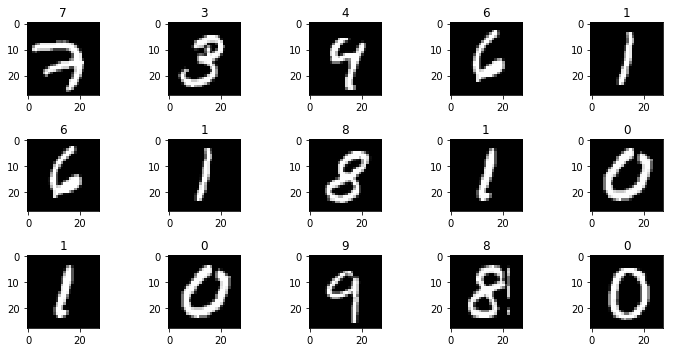

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt

row = 3
col = 5
fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(10, 5))

for i in range(row):
    for j in range(col):
        image = train_X[row * i + j].reshape((28, 28))
        label = train_Y[row * i + j]
        axes[i, j].set_title(label)
        axes[i, j].imshow(image, cmap='gray')
plt.tight_layout()


In [3]:
import csv
import random
import numpy as np


In [4]:
def KNN(train_X, train_Y, test_X, test_Y, k=3):
    # 计算欧式距离
    def _distance(x, y):
        return np.sqrt(np.sum(np.power(np.subtract(x, y), 2)))

    # 计算K近邻
    def _neighbors(trainset, labels, x, k):
        distances = []
        for d in trainset:
            distance = _distance(d, x)
            distances.append(distance)

        disIndex = np.array(distances).argsort()

        neighbors = []
        for i in range(k):
            neighbors.append(labels[disIndex[i]])
        return neighbors

    # 计算投票结果
    def _vote(neighbors):
        classes = {}
        for n in neighbors:
            if n in classes.keys():
                classes[n] += 1
            else:
                classes[n] = 1
        return sorted(classes.items(), key=lambda item: item[1], reverse=True)[0][0]

    # 计算正确率
    def _accaucy(test_Y, predictions):
        collect = 0
        for i in range(len(test_Y)):
            if test_Y[i] == predictions[i]:
                collect += 1
        return collect / float(len(test_Y))

    predictions = []
    for x in test_X:
        neighbors = _neighbors(train_X, train_Y, x, k)
        pred = _vote(neighbors)
        predictions.append(pred)
    return _accaucy(test_Y, predictions)


In [5]:
# 近邻数量
k_list = range(1, 10, 2)
acc_list = []

for k in k_list:
    acc = KNN(train_X, train_Y, test_X, test_Y, k)
    acc_list.append(acc)
    print('k=%d | Accaucy=%.3f%%' % (k, acc * 100))


k=1 | Accaucy=90.400%
k=3 | Accaucy=90.300%
k=5 | Accaucy=90.400%
k=7 | Accaucy=90.200%
k=9 | Accaucy=89.700%


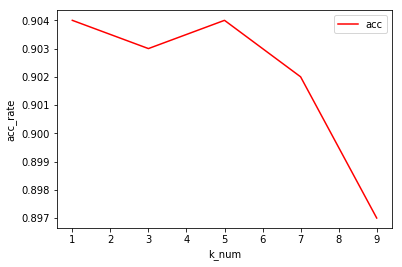

In [6]:
plt.plot(k_list, acc_list, label='acc', color='red')
plt.xlabel('k_num')
plt.ylabel('acc_rate')
plt.legend()
plt.show()
